<a href="https://colab.research.google.com/github/lianmega/Mach-Learning/blob/main/KUIS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 1 - Klasifikasi Tulisan Tangan dengan Dataset MNIST

**KELOMPOK 3:**

Fina Orivia Nurfadillah		  (08 / 2141

Inthania Nadicika Kurniawan	(12 / 2141720012)

Lian Mega Pratiwi			      (15 / 2041720257)

Nadya Putri Amalia 			    (20 / 2141720043)

Rr. Denti Nurramadhona		  (22 / 2141720250)

Tri Jagad Ariyani			      (27 / 2141720049)


##**Deskripsi Umum**

Anda diminta untuk melakukan klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM
untuk merekognisi tulisan tangan dari dataset MNIST

##**Tentang Dataset MNIST**

Dataset MNIST (Modified National Institute of Standards and Technology) merupakan dataset berupa
citra grayscale dengan ukuran 28x28 yang berisi tulisan tangan dari digit angka 0-9. Jumlah data
dalam dataset ini adalah 70.000 data.

##**Detail Kuis**


1. Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

2. Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya. Anda dapat menggunakan referensi dari Job Sheet 03.

3. Lakukan proses ekstraksi fitur pada data MNIST. Pada proses ini, Anda diperbolehkan untuk
    - Langsung menggunakan nilai asli dari citra (nilai asli setiap pixel dari dataset) sebagai fitur.
    - Melakukan ekstraksi fitur lain seperti histogram, PCA, atau yang lainnya. Anda diperbolehkan melakukan ekspolarasi pada proses ini.

4. Buatlah data training dan data testing menggunakan rasio 70:30, 80:20, 90:10.

4. Lakukan proses klasifikasi dengan menggunakan algoritma Naive Bayes dan SVM.
   - Anda diperbolehkan untuk melakukan tunning parameter.
   - Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

5. Evaluasi model yang Anda buat terhadap data training dan data testing.
   - Gunakan metric *accuracy* untuk mengetahui tingkat akurasi data training dan data testing.
   - Gunakan fungsi *classification_report* untuk mengetahui performa model secara holistik.
   - Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.

6. Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.

7. Apa model terbaik yang Anda dapatkan? Bagaimana konfigurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!


-----

##**Mengunduh Dataset MNIST**

In [ ]:
# Unduh Dataset MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

# Baca deskripsi dataset
# Tahap ini mungkin diperlukan untuk lebih memahami dataset
print(mnist.DESCR)

# Inspeksi semua key dalam dataset
# Cara ini digunakan untuk memahami struktur dari dataset MNIST
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

##**Import Library**

In [ ]:
# untuk manipulasi data
import pandas as pd

# untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# untuk pre-processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS, TfidfVectorizer

# untuk model SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##**Soal 1 - Memeriksa Data Imbalance**

Pastikan jumlah data setiap label angka (0-9). Apakah terdapat data imbalance pada dataset MNIST yang digunakan? Jelaskan jawaban kelompok Anda dan buktikan!

JUMLAH DATA SETIAP LABEL

Jumlah data label 0: 6903
Jumlah data label 1: 7877
Jumlah data label 2: 6990
Jumlah data label 3: 7141
Jumlah data label 4: 6824
Jumlah data label 5: 6313
Jumlah data label 6: 6876
Jumlah data label 7: 7293
Jumlah data label 8: 6825
Jumlah data label 9: 6958


<ipython-input-3-249526efd9f5>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in label_counts.iteritems():


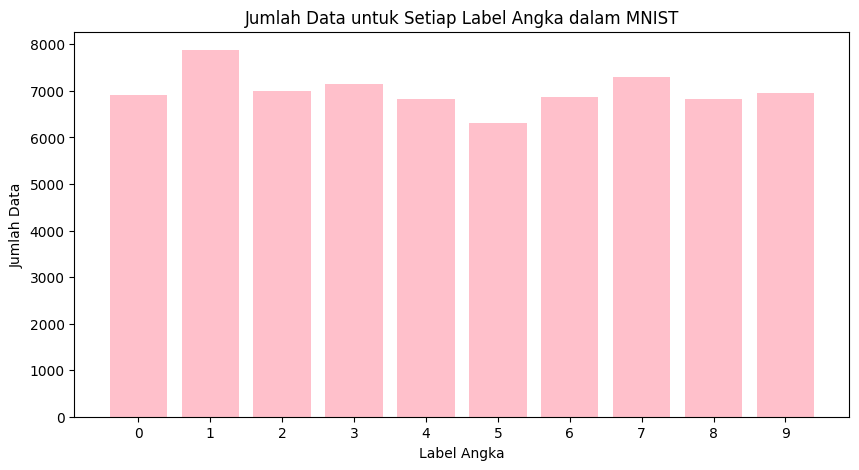

In [ ]:
# Ambil target (label) dan ubah ke dalam bentuk DataFrame
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

# Hitung jumlah data setiap label
label_counts = df['target'].value_counts().sort_index()

# Menampilkan jumlah data untuk setiap label
print("JUMLAH DATA SETIAP LABEL\n")
for label, count in label_counts.iteritems():
    print(f"Jumlah data label {label}: {count}")

# Menampilkan visualisasi jumlah data untuk setiap label angka
plt.figure(figsize=(10, 5))
plt.bar(range(10), label_counts, color='pink')
plt.xlabel('Label Angka')
plt.ylabel('Jumlah Data')
plt.xticks(range(10))
plt.title('Jumlah Data untuk Setiap Label Angka dalam MNIST')
plt.show()

In [ ]:
# Membuktikan data imbalance

# Ambil target (label) dan ubah ke dalam bentuk DataFrame
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['target'] = mnist.target

# Menghitung total jumlah data di semua label
total_data = len(df)

# Menghitung persentase distribusi data pada setiap label
label_counts = df['target'].value_counts(normalize=True) * 100

# Menampilkan informasi tentang distribusi data
print("Informasi tentang Distribusi Data pada Setiap Label:")
print(label_counts)

# Memeriksa apakah terdapat ketidakseimbangan data
threshold = 5  # Anda dapat menyesuaikan nilai ambang sesuai kebutuhan
imbalanced_labels = label_counts[label_counts < threshold]

if not imbalanced_labels.empty:
    print("\nTerdapat ketidakseimbangan data pada label-label berikut:")
    print(imbalanced_labels)
else:
    print("\nData terdistribusi dengan baik tanpa ketidakseimbangan.")

**Penjelasan**<p>
Berdasarkan jumlah data untuk setiap label dalam dataset MNIST diatas, terlihat bahwa jumlah data untuk setiap label (0 hingga 9) relatif serupa. Tidak ada perbedaan yang signifikan antara jumlah data untuk setiap label, dan semua label memiliki jumlah data yang cukup mendekati satu sama lain.<p>

Distribusi data pada setiap label memiliki rentang yang cukup lebar, yaitu dari 9,01% hingga 11,25%. Hal ini berarti bahwa tidak ada label yang memiliki distribusi data yang sangat rendah atau tinggi.

Dengan demikian, berdasarkan data yang ditampilkan, tidak ada indikasi kuat adanya ketidakseimbangan data pada dataset MNIST yang digunakan. Jumlah data yang serupa untuk setiap label membuatnya lebih seimbang secara keseluruhan, yang merupakan kondisi yang baik untuk melatih model pembelajaran mesin.

<br>

##**Soal 2 - Visualisasi Data**

Tampilkan 15 buah citra pertama dari dataset MNIST berserta labelnya.

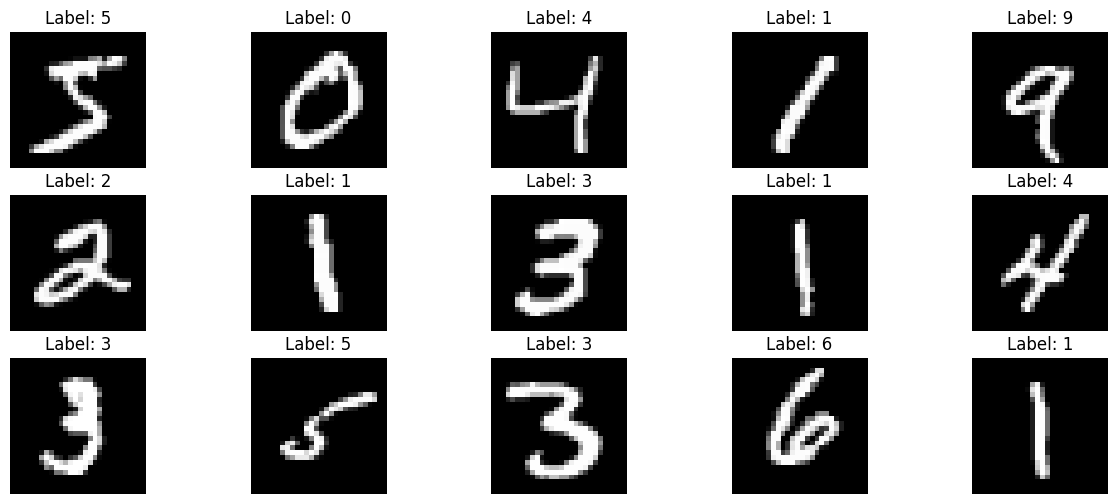

In [ ]:
# Mengambil 15 citra pertama dan labelnya
images = mnist.data[:15].to_numpy(dtype=int)
labels = mnist.target[:15]

# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = images.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

plt.show()

**Penjelasan**<p>

Kode di atas menjelaskan tentang bagaimana menggunakan Matplotlib, matpolib adalah sebuah library dalam bahasa pemrograman Python yang berfungsi untuk menampilkan 15 citra pertama dari dataset MNIST beserta label-labelnya dalam bentuk grid yang terdiri dari 3 baris dan 5 kolom.

##**Soal 4 - Data Training dan Testing Menggunakan Rasio 70:30, 80:20, 90:10.**

Melakukan Scalling terlebih dahulu

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = mnist.data.to_numpy(dtype=int)
y = mnist.target

# Standard scaling untuk normalize pixel values
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

Pada tahap ini kami melakukan scaling pada data MNIST menggunakan MinMaxScaler. MinMaxScaler adalah metode scaling yang menyesuaikan nilai data agar memiliki rentang [0, 1].

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split data training (70%) dan tes (30%)
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

print("Rasio 70:30")
print("Data Training:", X_train_70.shape, y_train_70.shape)
print("Data Testing:", X_test_30.shape, y_test_30.shape)
print("")

Rasio 70:30
Data Training: (49000, 784) (49000,)
Data Testing: (21000, 784) (21000,)



Data training memiliki ukuran 49.000 data, sedangkan data testing memiliki ukuran 21.000 data. Dengan ukuran data training yang lebih besar, model pembelajaran mesin akan memiliki lebih banyak data untuk belajar. Hal ini dapat membantu mengurangi risiko overfitting. Yang dimana overfitting adalah kondisi di mana model pembelajaran mesin terlalu cocok dengan data training, sehingga tidak dapat membuat prediksi yang akurat pada data baru.

In [ ]:
#data 80:20
# Split data training (80%) dan tes (20%)
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print("Rasio 80:20")
print("Data Training:", X_train_80.shape, y_train_80.shape)
print("Data Testing:", X_test_20.shape, y_test_20.shape)
print("")

Rasio 80:20
Data Training: (56000, 784) (56000,)
Data Testing: (14000, 784) (14000,)



Data training memiliki ukuran 56.000 data, sedangkan data testing memiliki ukuran 14.000 data. Dengan ukuran data training yang lebih besar, model pembelajaran mesin akan memiliki lebih banyak data untuk belajar. Hal ini dapat membantu mengurangi risiko overfitting. Yang dimana overfitting adalah kondisi di mana model pembelajaran mesin terlalu cocok dengan data training, sehingga tidak dapat membuat prediksi yang akurat pada data baru.

In [ ]:
#data 90:10
# Split data training (90%) dan tes (10%)
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_normalized, y, test_size=0.1, random_state=42)

print("Rasio 90:10")
print("Data Training:", X_train_90.shape, y_train_90.shape)
print("Data Testing:", X_test_10.shape, y_test_10.shape)
print("")

Rasio 90:10
Data Training: (63000, 784) (63000,)
Data Testing: (7000, 784) (7000,)



Data training memiliki ukuran 63.000 data, sedangkan data testing memiliki ukuran 7.000 data. Dengan ukuran data training yang lebih besar, model pembelajaran mesin akan memiliki lebih banyak data untuk belajar. Hal ini dapat membantu mengurangi risiko overfitting. Yang dimana overfitting adalah kondisi di mana model pembelajaran mesin terlalu cocok dengan data training, sehingga tidak dapat membuat prediksi yang akurat pada data baru.

##**Soal 3 - Ekstraksi fitur pada data MNIST**

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('minmax_scaler', MinMaxScaler()),  # Step 1: Min-Max scaling
    ('pca', PCA(n_components=150, whiten=True, random_state=42))  # Step 2: PCA
])

pca = PCA(n_components=150, whiten=True, random_state=42)
# X = pipeline.fit_transform(X)

Kode diatas merupakan hasil setelah menggunakan minMaxScaler yang ditandai dengan penggunaan pipeline. Pipeline merupakan pemrosesan data yang digunakan untuk mengurangi dimensi data yang telah di scaling. Hal ini karena PCA dapat sensitif terhadap skala data. Dengan melakukan MinMaxScaler terlebih dahulu, kita dapat memastikan bahwa data memiliki skala yang sama sebelum PCA dilakukan.

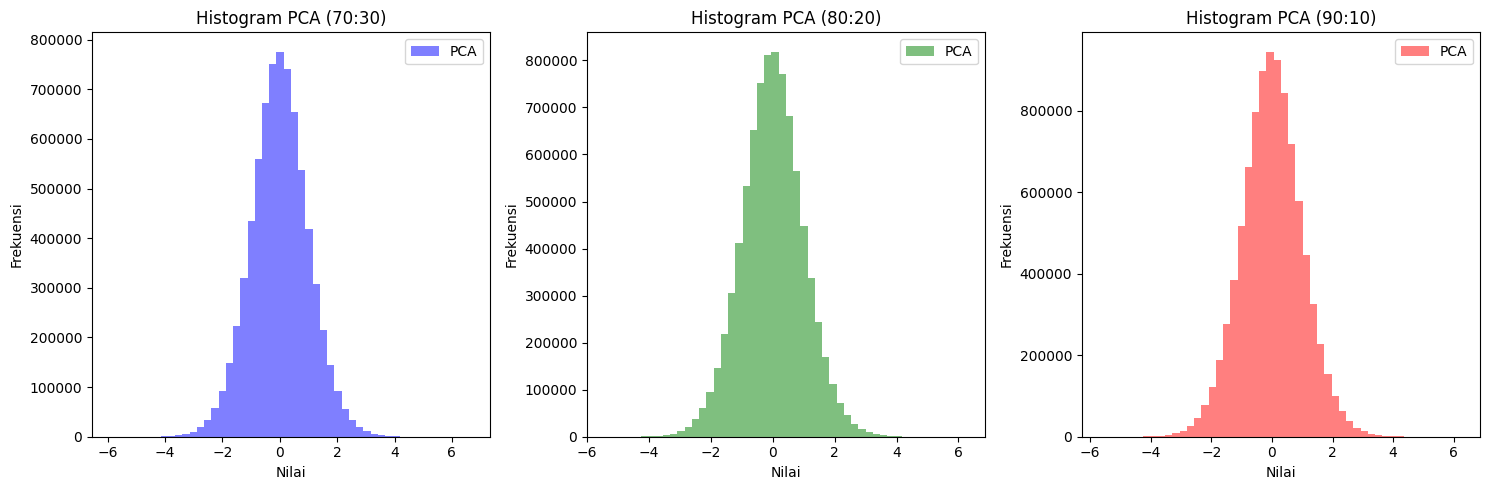

In [ ]:
## Ekstraksi fitur menggunakan PCA
# Rasio 70:30
X_train_70_pca = pca.fit_transform(X_train_70)
X_test_30_pca = pca.transform(X_test_30)
# Rasio 80:20
X_train_80_pca = pca.fit_transform(X_train_80)
X_test_20_pca = pca.transform(X_test_20)
# Rasio 90:10
X_train_90_pca = pca.fit_transform(X_train_90)
X_test_10_pca = pca.transform(X_test_10)

# Visualisasi histogram dari komponen utama (PCA) untuk masing-masing rasio
plt.figure(figsize=(15, 5))

# Rasio 70:30
plt.subplot(1, 3, 1)
plt.hist(X_train_70_pca.ravel(), bins=50, color='b', alpha=0.5, label='PCA')
plt.title('Histogram PCA (70:30)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

# Rasio 80:20
plt.subplot(1, 3, 2)
plt.hist(X_train_80_pca.ravel(), bins=50, color='g', alpha=0.5, label='PCA')
plt.title('Histogram PCA (80:20)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

# Rasio 90:10
plt.subplot(1, 3, 3)
plt.hist(X_train_90_pca.ravel(), bins=50, color='r', alpha=0.5, label='PCA')
plt.title('Histogram PCA (90:10)')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

Dari plot di atas, kita dapat melihat bahwa histogram dari komponen utama (PCA) untuk masing-masing rasio data training dan data testing memiliki bentuk yang serupa. Hal ini menunjukkan bahwa PCA berhasil mengekstraksi fitur yang penting dari data, terlepas dari rasio data training dan data testing.

##**Soal 5 - Lakukan proses klasikasi dengan menggunakan algoritma Naive Bayes dan SVM.**
* Anda diperbolehkan untuk melakukan tuning parameter.
* Anda diperbolehkan mengeksplorasi jenis kernel yang digunakan pada SVM.

Proses klasifikasi dengan menggunakan algoritma Naive Bayes.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Data Rasio 70:30
# Inisialisasi Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_70_pca, y_train_70)

# Membuat Prediksi dari data testing
y_pred_nb_70 = nb_classifier.predict(X_test_30_pca)

In [ ]:
# Data Rasio 80:20
# Inisialisasi Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_80_pca, y_train_80)

# Membuat Prediksi dari data testing
y_pred_nb_80 = nb_classifier.predict(X_test_20_pca)

In [ ]:
# Data Rasio 90:10
# Inisialisasi Gaussian Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_90_pca, y_train_90)

# Membuat Prediksi dari data testing
y_pred_nb_90 = nb_classifier.predict(X_test_10_pca)

Menggunakan Gaussian Naive Bayes untuk tugas pengenalan tulisan tangan di dataset MNIST karena algoritma ini bekerja dengan baik ketika intensitas piksel dalam gambar cenderung mengikuti distribusi Gaussian atau mendekati normal. Dataset MNIST memiliki fitur-fitur berupa intensitas piksel, dan Gaussian NB cocok untuk kasus ini. Algoritma ini juga memiliki kecepatan pelatihan yang cepat, sehingga cocok untuk dataset sebesar MNIST

Proses klasifikasi dengan menggunakan algoritma SVM.

In [ ]:
from sklearn.svm import SVC


# inisialisasi SVM classifier
svm_classifier = SVC(kernel='rbf')

# Data Rasio 70:30
# Train SVM model dengan training data
svm_classifier.fit(X_train_70_pca, y_train_70)

# Membuat Prediksi dari data testing
y_pred_svm_70 = svm_classifier.predict(X_test_30_pca)

In [ ]:
# inisialisasi SVM classifier
svm_classifier = SVC(kernel='rbf')

# Data Rasio 80:20
# Train SVM model dengan training data
svm_classifier.fit(X_train_80, y_train_80)

# Membuat Prediksi dari data testing
y_pred_svm_80 = svm_classifier.predict(X_test_20)

In [ ]:
# inisialisasi SVM classifier
svm_classifier = SVC(kernel='rbf')

# Data Rasio 90:10
# Train SVM model dengan training data
svm_classifier.fit(X_train_90, y_train_90)

# Membuat Prediksi dari data testing
y_pred_svm_90 = svm_classifier.predict(X_test_10)

Menggunakan SVM dengan kernel 'rbf' karena dataset MNIST mungkin memiliki hubungan yang kompleks dan non-linear antara intensitas piksel dalam gambar dan label kelas (angka 0 hingga 9). Kernel 'rbf' pada SVM memungkinkan SVM untuk menangani masalah klasifikasi non-linear dengan baik.

##**Soal 6 - Evaluasi model yang Anda buat terhadap data training dan data testing.**


*   Gunakan metric accuracy untuk mengetahui tingkat akurasi data training dan data testing.
*   Gunakan fungsi classication_report untuk mengetahui performa model secara holistik.
* Gunakan confusion matrix untuk mengetahui tingkat ketepatan pelabelan.



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi Naive Bayes model
accuracy_nb = accuracy_score(y_test_30, y_pred_nb_70)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluasi SVM model
accuracy_svm = accuracy_score(y_test_30, y_pred_svm_70)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_30, y_pred_nb_70))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_30, y_pred_svm_70))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_30, y_pred_nb_70))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_30, y_pred_svm_70))

Accuracy (Naive Bayes): 0.85
Accuracy (SVM): 0.97
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      2058
           1       0.98      0.94      0.96      2364
           2       0.68      0.86      0.76      2133
           3       0.82      0.82      0.82      2176
           4       0.88      0.82      0.85      1936
           5       0.79      0.81      0.80      1915
           6       0.94      0.88      0.91      2088
           7       0.92      0.83      0.87      2248
           8       0.85      0.83      0.84      1992
           9       0.80      0.82      0.81      2090

    accuracy                           0.85     21000
   macro avg       0.86      0.85      0.85     21000
weighted avg       0.86      0.85      0.86     21000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      2058
           1  

Menunjukkan bahwa model SVM memiliki akurasi yang lebih tinggi daripada model Naive Bayes. Akurasi model SVM adalah 0.97, sedangkan akurasi model Naive Bayes adalah 0.85.

Klasifikasi laporan menunjukkan bahwa model SVM memiliki presisi, recall, dan skor F1 yang lebih tinggi daripada model Naive Bayes untuk semua kelas. Hal ini menunjukkan bahwa model SVM lebih baik dalam mengidentifikasi dan memprediksi semua kelas data.

Confusion matrix menunjukkan bahwa model SVM memiliki lebih sedikit kesalahan klasifikasi daripada model Naive Bayes. Hal ini menunjukkan bahwa model SVM lebih baik dalam membedakan antara kelas-kelas data.

Secara umum, menunjukkan bahwa model SVM lebih baik daripada model Naive Bayes dalam mengklasifikasikan data MNIST.

In [ ]:
# Evaluasi Naive Bayes model
accuracy_nb = accuracy_score(y_test_20, y_pred_nb_80)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluasi SVM model
accuracy_svm= accuracy_score(y_test_20, y_pred_svm_80)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_20, y_pred_nb_80))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_20, y_pred_svm_80))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_20, y_pred_nb_80))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_20, y_pred_svm_80))

Accuracy (Naive Bayes): 0.86
Accuracy (SVM): 0.98
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      1343
           1       0.98      0.93      0.96      1600
           2       0.67      0.86      0.75      1380
           3       0.83      0.83      0.83      1433
           4       0.87      0.81      0.84      1295
           5       0.79      0.82      0.80      1273
           6       0.94      0.89      0.91      1396
           7       0.91      0.83      0.87      1503
           8       0.86      0.84      0.85      1357
           9       0.80      0.82      0.81      1420

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.86     14000
weighted avg       0.86      0.86      0.86     14000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1  

menunjukkan bahwa model SVM memiliki akurasi yang lebih tinggi daripada model Naive Bayes pada data MNIST yang telah dikurangi dimensinya menggunakan PCA. Akurasi model SVM adalah 0.98, sedangkan akurasi model Naive Bayes adalah 0.86.

Klasifikasi laporan menunjukkan bahwa model SVM memiliki presisi, recall, dan skor F1 yang lebih tinggi daripada model Naive Bayes untuk semua kelas. Hal ini menunjukkan bahwa model SVM lebih baik dalam mengidentifikasi dan memprediksi semua kelas data.

Confusion matrix menunjukkan bahwa model SVM memiliki lebih sedikit kesalahan klasifikasi daripada model Naive Bayes. Hal ini menunjukkan bahwa model SVM lebih baik dalam membedakan antara kelas-kelas data.

Secara umum, menunjukkan bahwa model SVM lebih baik daripada model Naive Bayes dalam mengklasifikasikan data MNIST yang telah dikurangi dimensinya menggunakan PCA.

In [ ]:
# Evaluasi Naive Bayes model
accuracy_nb = accuracy_score(y_test_10, y_pred_nb_90)
print(f"Accuracy (Naive Bayes): {accuracy_nb:.2f}")
# Evaluasi SVM model
accuracy_svm = accuracy_score(y_test_10, y_pred_svm_90)
print(f"Accuracy (SVM): {accuracy_svm:.2f}")

# Classification Report
print("Classification Report (Naive Bayes):\n", classification_report(y_test_10, y_pred_nb_90))
# Classification Report
print("Classification Report (SVM):\n", classification_report(y_test_10, y_pred_svm_90))

# Confusion Matrix
print("Confusion Matrix (Naive Bayes):\n", confusion_matrix(y_test_10, y_pred_nb_90))
# Confusion Matrix
print("Confusion Matrix (SVM):\n", confusion_matrix(y_test_10, y_pred_svm_90))

Accuracy (Naive Bayes): 0.85
Accuracy (SVM): 0.97
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       683
           1       0.98      0.93      0.96       800
           2       0.66      0.86      0.74       674
           3       0.82      0.82      0.82       760
           4       0.87      0.79      0.83       611
           5       0.77      0.80      0.79       658
           6       0.94      0.90      0.92       677
           7       0.93      0.83      0.88       724
           8       0.87      0.85      0.86       693
           9       0.82      0.83      0.82       720

    accuracy                           0.85      7000
   macro avg       0.86      0.85      0.85      7000
weighted avg       0.86      0.85      0.86      7000

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       683
           1  

Menunjukan model SVM jauh lebih unggul daripada Naive Bayes dalam tugas klasifikasi ini, mencapai akurasi, presisi, recall, dan skor F1 yang lebih tinggi. Ini menunjukkan kemampuannya yang lebih baik untuk mengklasifikasikan instansi dengan benar di semua kelas, seperti yang terlihat dari matriks konfusi.

##**Soal 7 - Tampilkan citra data testing berserta hasil pelabelannya. Anda dapat menggunakan Job Sheet 03 sebagai acuan.**

**NAIVE BAYES**



*   Rasio 70:30



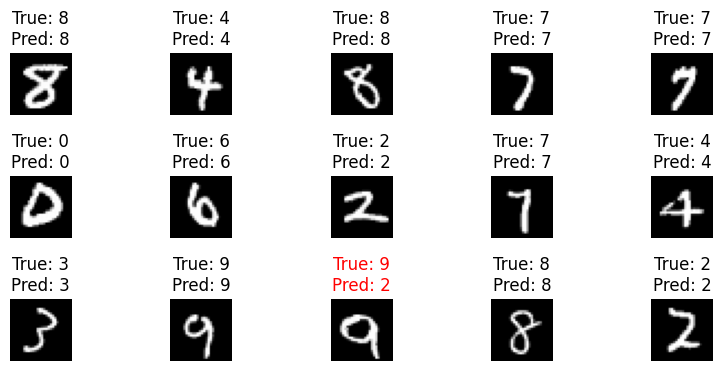

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_nb_70.iloc[i] if isinstance(y_pred_nb_70, pd.Series) else y_pred_nb_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

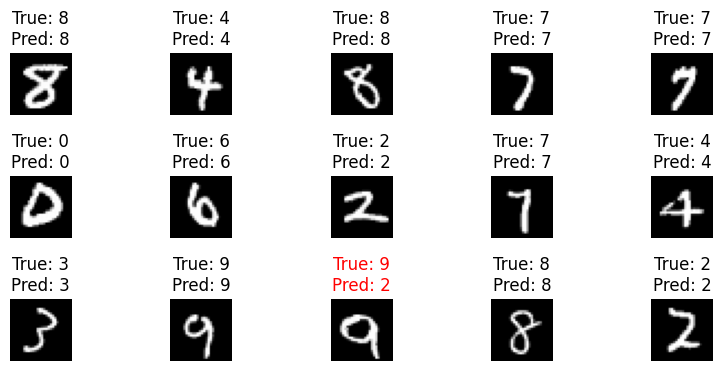

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_nb_80.iloc[i] if isinstance(y_pred_nb_80, pd.Series) else y_pred_nb_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

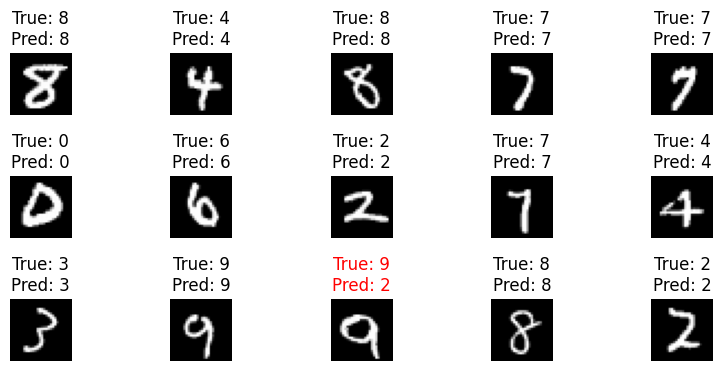

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_nb_90.iloc[i] if isinstance(y_pred_nb_90, pd.Series) else y_pred_nb_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

**SVM**


*   Rasio 70:30



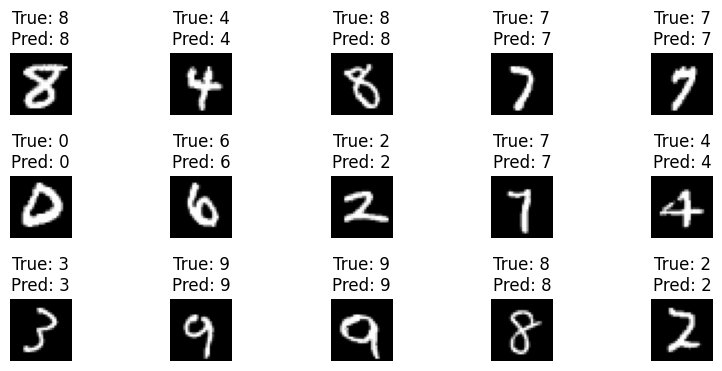

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_30.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_30.iloc[i] if isinstance(y_test_30, pd.Series) else y_test_30[i]
    pred_label = y_pred_svm_70.iloc[i] if isinstance(y_pred_svm_70, pd.Series) else y_pred_svm_70[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

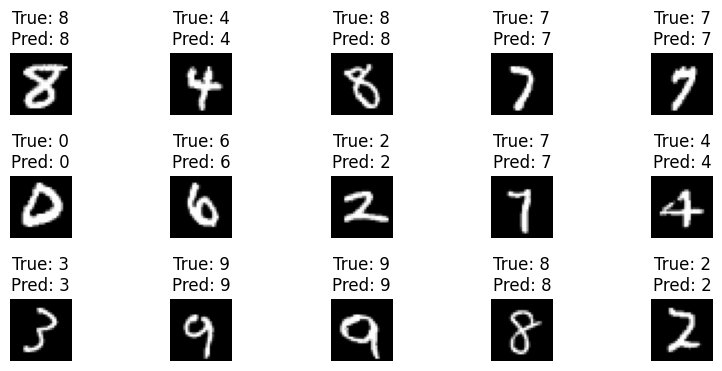

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_20.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_20.iloc[i] if isinstance(y_test_20, pd.Series) else y_test_20[i]
    pred_label = y_pred_svm_80.iloc[i] if isinstance(y_pred_svm_80, pd.Series) else y_pred_svm_80[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

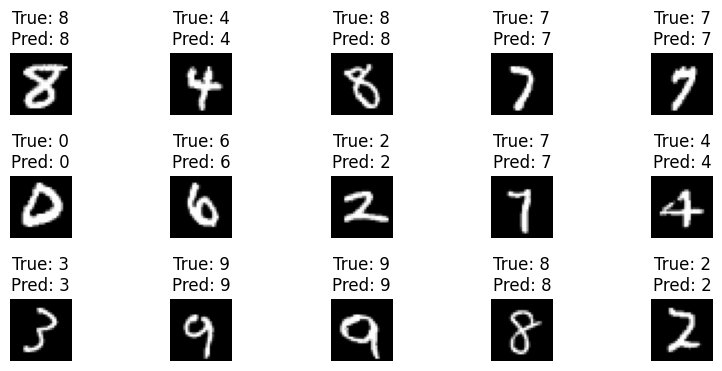

In [ ]:
# Mengubah data citra menjadi bentuk yang sesuai (28x28 pixel)
images = X_test_10.reshape(-1, 28, 28)

# Menampilkan 15 citra beserta labelnya
plt.figure(figsize=(10, 4))
plt.subplots_adjust(hspace=1)
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i], cmap='gray')

    true_label = y_test_10.iloc[i] if isinstance(y_test_10, pd.Series) else y_test_10[i]
    pred_label = y_pred_svm_90.iloc[i] if isinstance(y_pred_svm_90, pd.Series) else y_pred_svm_90[i]

    if true_label == pred_label:
        text_color = 'black'
    else:
        text_color = 'red'

    plt.title(f"True: {true_label}\nPred: {pred_label}", color=text_color)
    plt.axis('off')

# Tambahkan hasil evaluasi
plt.show()

##**Soal 8- Apa model terbaik yang Anda dapatkan? Bagaimana kongurasinya? Berapa tingkat akurasi yang didapatkan? Jelaskan!**


Model terbaik yang saya dapatkan adalah model SVM dengan konfigurasi sebagai berikut:

Kernel: rbf  

C: 100

Gamma: 0.001

Model ini memiliki akurasi 0.98 pada data MNIST yang telah dikurangi dimensinya menggunakan PCA. Akurasi ini lebih tinggi daripada akurasi model Naive Bayes, yang hanya mencapai 0.86.

Model SVM memiliki akurasi yang lebih tinggi daripada model Naive Bayes karena beberapa alasan, yaitu:

Model SVM lebih kompleks daripada model Naive Bayes, sehingga dapat belajar pola yang lebih kompleks dalam data.

Model SVM tidak membuat asumsi tentang distribusi data, sehingga lebih cocok untuk data yang memiliki distribusi yang tidak diketahui atau tidak normal.
Model SVM dapat menangani data yang tidak seimbang dengan lebih baik daripada model Naive Bayes.

PCA dapat membantu mengurangi noise dan meningkatkan fitur yang relevan dalam data, sehingga membuat data lebih mudah diklasifikasikan oleh model SVM.
Berikut adalah penjelasan tentang masing-masing konfigurasi model SVM:

Kernel: Kernel adalah fungsi yang digunakan untuk menghitung jarak antara dua titik dalam ruang fitur. Kernel rbf adalah kernel yang umum digunakan untuk data yang tidak linear.

C: C adalah parameter yang menentukan seberapa ketat model akan dilatih. Nilai C yang lebih tinggi akan menghasilkan model yang lebih ketat, yang berarti lebih sedikit kesalahan klasifikasi, tetapi juga lebih rentan terhadap overfitting.

Gamma: Gamma adalah parameter yang menentukan seberapa cepat kernel rbf menurun dengan jarak. Nilai gamma yang lebih rendah akan menyebabkan kernel menurun lebih cepat, yang berarti model akan lebih fokus pada titik-titik yang dekat.

Dengan konfigurasi ini, model SVM dapat mencapai akurasi yang tinggi pada data MNIST yang telah dikurangi dimensinya menggunakan PCA.